In [1]:
#importing all needed libarary
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [3]:
#reading data set 
cd=pd.read_csv('C:\\Users\\mr.panwar\\Desktop\\Country-data.csv')
cd.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
cd['exports'] = cd['exports']*cd['gdpp']/100
cd['imports'] = cd['imports']*cd['gdpp']/100
cd['health'] = cd['health']*cd['gdpp']/100

In [5]:
#checking important diteals
cd.shape

(167, 10)

In [6]:
cd.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [7]:
#checking for null and nan values
cd.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
cd.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
#checking 5 point summery
cd.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


C:\Users\mr.panwar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


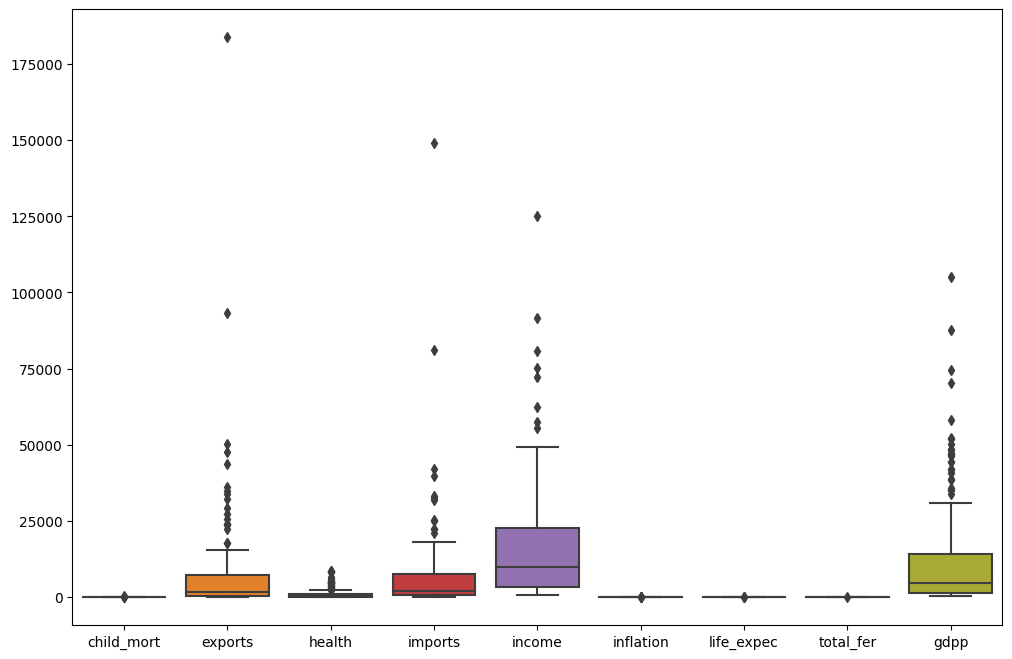

In [11]:
#lest check outlier by plotings
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=cd)
plt.show()

i got outliers in income, export,import and gdpp column

In [12]:
#handling outlier
cd_updated = cd.iloc[:,:]

def outliers_for_features(cd, col):    
    Q1 = cd.loc[:,col].quantile(0.25)
    Q3 = cd.loc[:,col].quantile(0.75)
    
    upper_limit = Q3 + 1.5*(Q3-Q1)
    lower_limit = Q1 - 1.5*(Q3-Q1)
    
    return cd_updated[col].apply(lambda x : upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)
    
for col in ['life_expec','inflation', 'total_fer', 'exports', 'imports', 'health', 'income', 'gdpp']:
    cd_updated[col] = outliers_for_features(cd, col)

C:\Users\mr.panwar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


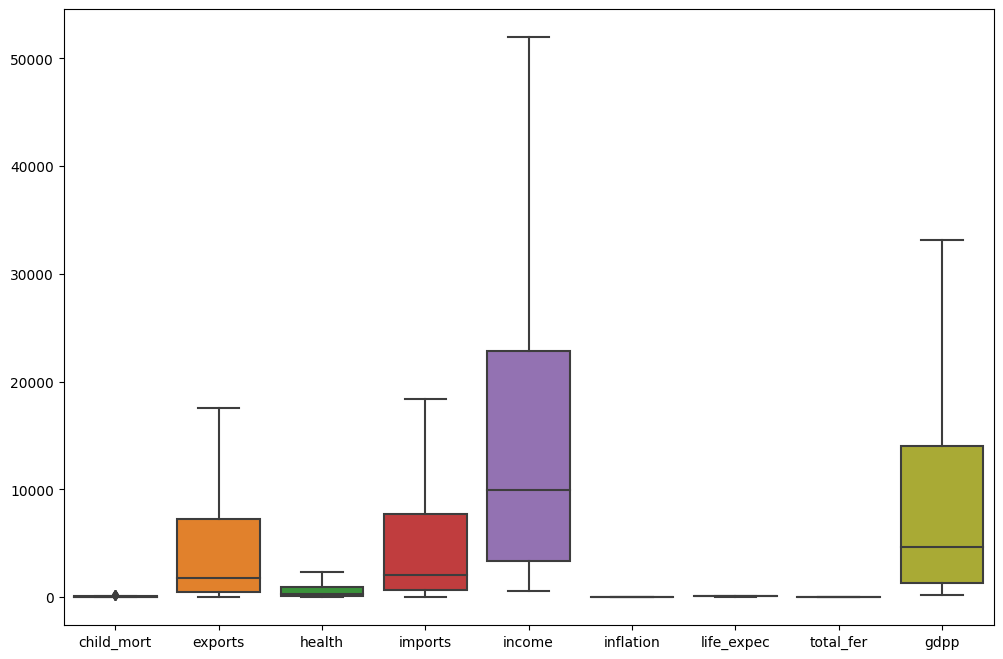

In [13]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=cd_updated)
plt.show()

checking corelation

In [14]:
cd_corr=cd.corr()

C:\Users\mr.panwar\AppData\Local\Temp\ipykernel_8844\1885440363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cd_corr=cd.corr()


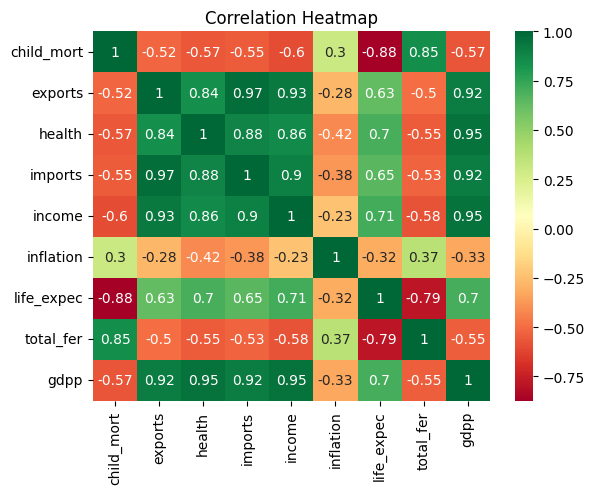

In [15]:
plt.figure()
sns.heatmap(cd_corr, annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap');

1. import are highly corelated with export.
2. Exoprt, Health, Import, Income also corelated with gdpp.

In [16]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [17]:
hopkins(cd.drop('country', axis = 1))

0.8700424533056591

In [18]:
hopkins(cd_updated.drop('country', axis = 1))

0.8915710065371599

In [19]:
from sklearn.preprocessing import StandardScaler
standard_cd = StandardScaler()
cd_scaled = standard_cd.fit_transform(cd_updated.iloc[:, 1:])

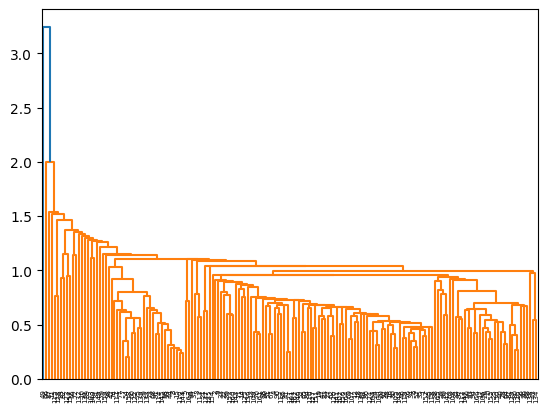

In [20]:
### Hierarchical Clustering
mergings_single = linkage(cd_scaled, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

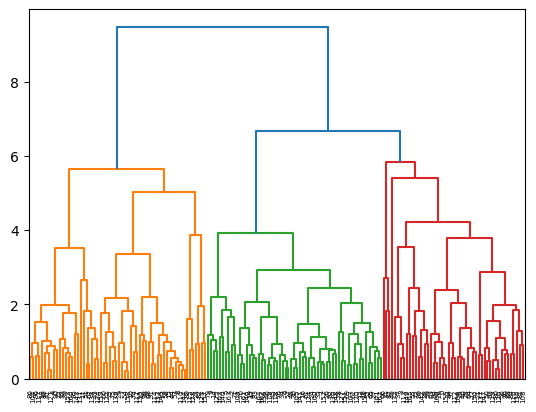

In [21]:
mergings_complete = linkage(cd_scaled, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

In [22]:
# Taking 3 clusters for hierarchical clustering
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
print(cluster_labels)
print(cluster_labels.shape)

[0 1 1 0 2 1 1 2 2 1 2 2 1 2 1 2 1 0 1 1 1 0 2 2 1 0 0 1 0 2 1 0 0 2 1 1 0
 0 0 2 0 2 2 2 2 1 1 1 1 0 0 2 1 2 2 0 0 1 2 0 2 1 1 0 0 1 0 2 2 1 1 1 0 2
 2 2 1 2 1 1 0 0 2 1 0 2 2 0 0 2 2 2 1 0 0 2 2 0 2 0 1 1 1 1 2 1 0 1 0 1 2
 2 0 0 2 2 0 2 1 1 1 2 2 2 1 1 0 1 2 0 1 2 0 2 2 2 0 0 2 2 1 1 0 2 2 2 1 0
 1 0 0 1 1 2 1 0 1 2 2 2 2 1 1 1 1 0 0]
(167,)


In [23]:
country_df_clustered = cd_updated.iloc[:,:]
#country_df_clustered = pd.concat([country_df_clustered, pd.DataFrame(km.labels_, columns=['cluster_id_km'])], axis = 1)
country_df_clustered = pd.concat([country_df_clustered, pd.DataFrame(cluster_labels, columns=['cluster_id_hc'])], axis = 1)
country_df_clustered.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_hc
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


C:\Users\mr.panwar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mr.panwar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mr.panwar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

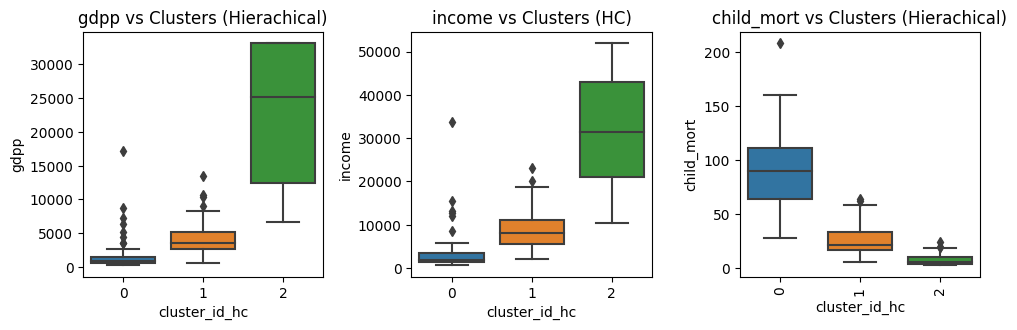

In [24]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2, 3, 1, title="gdpp vs Clusters (Hierachical)")


ax2 = fig.add_subplot(2, 3, 2, title="income vs Clusters (HC)")


ax3 = fig.add_subplot(2, 3, 3, title="child_mort vs Clusters (Hierachical)")


sns.boxplot(country_df_clustered['cluster_id_hc'],country_df_clustered['gdpp'],ax=ax1)


sns.boxplot(country_df_clustered['cluster_id_hc'],country_df_clustered['income'],ax=ax2)


sns.boxplot(country_df_clustered['cluster_id_hc'],country_df_clustered['child_mort'],ax=ax3)


plt.xticks(rotation=90)
plt.tight_layout()

In [25]:
print(country_df_clustered['cluster_id_hc'].value_counts())


2    60
1    59
0    48
Name: cluster_id_hc, dtype: int64


In [26]:
print("Cluster 0 of Hierarchical Clustering model")
print(country_df_clustered[country_df_clustered['cluster_id_hc'] == 0].country.unique())

print("Cluster 1 of Hierarchical Clustering model")
print(country_df_clustered[country_df_clustered['cluster_id_hc'] == 1].country.unique())

print("Cluster 2 of Hierarchical Clustering model")
print(country_df_clustered[country_df_clustered['cluster_id_hc'] == 2].country.unique())

Cluster 0 of Hierarchical Clustering model
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'Solomon Islands' 'South Africa' 'Sudan'
 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']
Cluster 1 of Hierarchical Clustering model
['Albania' 'Algeria' 'Argentina' 'Armenia' 'Azerbaijan' 'Bangladesh'
 'Belarus' 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'China' 'Colombia' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Fiji' 'Georgia' 'Grenada' 'Guatemala' 'Guyana'
 'India' 'Indonesia' 'Iran' 'Jamaica' 'Jordan' 'Kazakhstan'
 'Kyrgyz Republic

In [27]:
country_df_clustered.head(5)     

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_hc
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [30]:
# Under-developed countries obtained from both the model

country_df_clustered[(country_df_clustered['cluster_id_hc']==0)].sort_values

<bound method DataFrame.sort_values of                       country  child_mort     exports    health    imports  \
0                 Afghanistan        90.2     55.3000   41.9174    248.297   
3                      Angola       119.0   2199.1900  100.6050   1514.370   
17                      Benin       111.0    180.4040   31.0780    281.976   
21                   Botswana        52.5   2768.6000  527.0500   3257.550   
25               Burkina Faso       116.0    110.4000   38.7550    170.200   
26                    Burundi        93.6     20.6052   26.7960     90.552   
28                   Cameroon       108.0    290.8200   67.2030    353.700   
31   Central African Republic       149.0     52.6280   17.7508    118.190   
32                       Chad       150.0    330.0960   40.6341    390.195   
36                    Comoros        88.2    126.8850   34.6819    397.573   
37           Congo, Dem. Rep.       116.0    137.2740   26.4194    165.664   
38                Congo, 

In [36]:
# Final list of under-developed countries, in order of socio-economic condition from worst to better -


country_df_clustered[(country_df_clustered['cluster_id_hc']==0)].sort_values(by=['gdpp', 'income', 'child_mort'],ascending= True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_hc
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.70,6.2600,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.80,5.0200,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.50,6.5400,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.80,7.0075,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.00,5.2000,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.790,60.80,4.6000,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.50,5.5600,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,48.05,5.2100,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.10,5.3100,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.600,61.70,4.6100,482.0,0


In [48]:
country_df_clustered[(country_df_clustered['cluster_id_hc']==0)].sort_values(by=['gdpp', 'income','child_mort'],ascending= True)[['country']].head(15)

,country
26,Burundi
88,Liberia
37,"Congo, Dem. Rep."
112,Niger
132,Sierra Leone
93,Madagascar
106,Mozambique
31,Central African Republic
94,Malawi
50,Eritrea


hear is top 15 country's that highly need help to increse grouth, helth.